In [5]:
# Import necessary libraries for numerical computation and visualization
import numpy as np                                    # Numerical arrays and mathematical functions
import matplotlib.pyplot as plt                       # Plotting and visualization
import test_suite as ts                               # Test cases for hyperbolic conservation laws
import misc as mi                                     # Miscellaneous utility functions (ghost cells, boundary conditions)
import GodunovFirstOrderUpwindScheme as godunov      # Godunov first-order upwind scheme implementation

## Test Case Selection

**Instantiate a test** from the `test` class : 1 among 5

The test suite provides several predefined test cases for hyperbolic conservation laws:
- **Test1**: Simple advection equation with constant coefficient
- **Test2**: Nonlinear conservation law (Burgers' equation)
- **Test3**: More complex initial conditions
- **Test4**: Different boundary conditions
- **Test5**: Advanced test case

Each test contains:
- Initial condition `u0(x)`
- Flux function `f(u)`
- Characteristic speed `a(u) = df/du`
- Spatial domain and grid parameters
- Final time `tFinal`

In [6]:
# Instantiate Test1 - a basic test case for the advection equation
# This creates an object containing all problem parameters:
# - Grid spacing (dx), time step (dt), CFL number (nu)
# - Initial condition function u0(x)
# - Flux function f(u) and characteristic speed a(u)
# - Spatial domain and final time
tst = ts.Test5()

In [7]:
# Display the test case properties
# This will show the parameters of the selected test case:
# - Domain size, grid resolution
# - Time step and CFL condition
# - Type of PDE being solved
tst

...................................................
              Tag number : 5
              Final time : 0.3
                  domain : (-1.0, 1.0)
   Number of grid points : 40
                     nu  : 0.8
                     dx  : 0.05
                     dt  : 0.04
         a (wave speed)  : <function Test5.__init__.<locals>.<lambda> at 0x000002584D35CC20>

## Numerical Scheme Setup

**Instantiate the `Scheme`** for the given test case

The Godunov first-order upwind scheme is a finite volume method that solves hyperbolic conservation laws of the form:

$$\frac{\partial u}{\partial t} + \frac{\partial f(u)}{\partial x} = 0$$

Key features:
- **Conservative**: Exactly preserves mass/energy
- **Monotone**: No spurious oscillations
- **TVD**: Total variation diminishing property
- **First-order accurate** in space and time

### Scheme Variants

For the Godunov case, we can choose between different implementations:

1. **`vanilla`** (default): 
   - Uses exact Riemann solver at each interface
   - Compares left/right states and selects appropriate flux
   - Most accurate but can be sensitive to discontinuities

2. **`viscosity`**: 
   - Adds artificial viscosity for enhanced stability
   - Uses Lax-Friedrichs type approach with local wave speeds
   - More robust but slightly more diffusive

The choice of form can significantly impact solution quality and is an important part of numerical analysis.

In [8]:
# Create Godunov scheme instance using the 'vanilla' form
# This initializes the numerical solver with:
# - Test case parameters (grid, time step, etc.)
# - Vanilla form (exact Riemann solver)
# - All flux computation methods ready for time-stepping
scheme = godunov.Godunov1(tst, form='vanilla')

# Alternative: Try the viscosity form for comparison
# scheme = godunov.Godunov1(tst, form='viscosity')

## Time Integration

**Compute the evolution** of the initial condition `u0` using the numerical scheme

This step performs the main computation:
1. **Time-stepping loop**: Advances solution from t=0 to t=tFinal
2. **Flux computation**: Calculates numerical fluxes at cell interfaces
3. **Conservative update**: Uses finite volume formula: u^{n+1} = u^n - (Δt/Δx)(F_{j+1/2} - F_{j-1/2})
4. **Boundary conditions**: Handles domain boundaries via ghost cells

The CFL condition must be satisfied for stability: ν = (Δt/Δx)|a| ≤ 1

In [9]:
# Run the numerical simulation from t=0 to t=tFinal
# This executes the main time-stepping algorithm:
# 1. Set up initial condition with ghost cells
# 2. Loop over time steps
# 3. Compute fluxes at interfaces using Riemann solver
# 4. Update cell averages using conservation law
# 5. Apply boundary conditions
# Result is stored in scheme.uF (final solution)
scheme.compute(scheme.tFinal)

## Results Visualization

**Plot comparison** between analytical and numerical solutions

This visualization shows:
- **Blue line**: Exact/theoretical solution at t=tFinal (if available)
- **Orange circles**: Numerical solution computed by the Godunov scheme
- **Dotted line**: Initial condition u₀(x) for reference

This allows us to assess:
- **Accuracy**: How close is the numerical solution to the exact one?
- **Conservation**: Is mass/energy preserved?
- **Monotonicity**: Are there spurious oscillations?
- **Resolution**: How well are discontinuities captured?

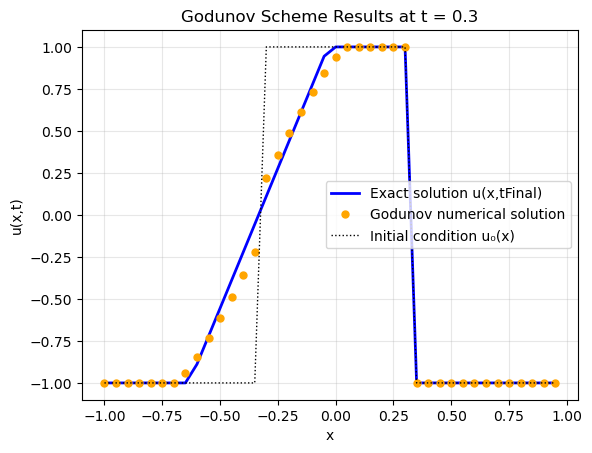

In [10]:
# Create comparison plot of solutions
# Blue line: Exact solution at final time (if available)
plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Godunov scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=5, 
         linestyle="None", label='Godunov numerical solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Godunov Scheme Results at t = {scheme.tFinal}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Additional analysis (optional)
# Uncomment the following lines to perform further analysis:

# # Compute numerical error (if exact solution is available)
# if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
#     error = np.abs(scheme.uF - scheme.uFinal)
#     l1_error = np.mean(error) * scheme.dx
#     l2_error = np.sqrt(np.mean(error**2)) * np.sqrt(scheme.dx)
#     linf_error = np.max(error)
#     print(f"L1 error: {l1_error:.6e}")
#     print(f"L2 error: {l2_error:.6e}")
#     print(f"L∞ error: {linf_error:.6e}")

# # Plot error distribution
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.plot(scheme.x, error, 'r-', linewidth=2)
# plt.xlabel('x')
# plt.ylabel('|u_numerical - u_exact|')
# plt.title('Pointwise Error')
# plt.grid(True)

# # Convergence study (requires multiple runs with different grid sizes)
# plt.subplot(1, 2, 2)
# # Add your convergence analysis here
# plt.title('Convergence Analysis')
# plt.show()